In [15]:
import pandas as pd
from modules import crfb, stats

In [16]:
data = crfb.get_data(exclude_states=False)
data.drop_duplicates(keep=False, inplace=True)
data = data.loc[data['Date Uploaded'] == '2021-02-03']
data

loading data from date 2021-02-03 : file 20210203_cmt.csv...
loading data from date 2021-02-02 : file 20210202_new_alternative_cmt.xlsx...
loading data from date 2021-01-25 : file 20210125_cmt.xlsx...
loading data from date 2021-01-20 : file 20210120_cmt.xlsx...
loading data from date 2020-12-21 : file 12212020_cmt.xlsx...
loading data from date 2020-12-14 : file 12142020_new_cmt.xlsx...
loading data from date 2020-12-07 : file 12072020_new_cmt.xlsx...
loading data from date 2020-11-30 : file 11302020_new_cmt.xlsx...
loading data from date 2020-11-20 : file 11202020_cmt.xlsx...
loading data from date 2020-11-13 : file 11132020_cmt.xlsx...
loading data from date 2020-11-09 : file 11092020_cmt.xlsx...
loading data from date 2020-10-30 : file 10302020_cmt.xlsx...
loading data from date 2020-10-28 : file 10282020_cmt.xlsx...
loading data from date 2020-10-23 : file cmt_main_10232020.xlsx...


,Date Uploaded,Recipient State,Amount Committed/Disbursed,Date,Recipient Type,Legislation,Agency
0,2021-02-03,Alabama,4.243599e+09,2020-04-15,Household,CARES Act,IRS
1,2021-02-03,Alaska,6.098270e+08,2020-04-15,Household,CARES Act,IRS
2,2021-02-03,Arizona,5.918266e+09,2020-04-15,Household,CARES Act,IRS
3,2021-02-03,Arkansas,2.650191e+09,2020-04-15,Household,CARES Act,IRS
4,2021-02-03,California,2.960029e+10,2020-04-15,Household,CARES Act,IRS
...,...,...,...,...,...,...,...
7607,2021-02-03,Illinois,9.500000e+06,2020-12-31,Small Business,CARES Act,Federal Reserve
7611,2021-02-03,Louisiana,7.125000e+06,2020-12-31,Small Business,CARES Act,Federal Reserve
7613,2021-02-03,New Mexico,1.187500e+07,2020-12-31,Small Business,CARES Act,Federal Reserve
7616,2021-02-03,California,1.662500e+07,2020-12-31,Small Business,CARES Act,Federal Reserve


In [17]:
leg_group = data.groupby('Legislation')['Amount Committed/Disbursed'].sum().to_frame()
leg_group.reset_index(inplace=True)
leg_group
leg_group['Amount Committed/Disbursed'].sum()
# By how large CARES act due to stimulus checks, this will

1420432313463.0

In [18]:
date_group = data.groupby('Date')['Amount Committed/Disbursed'].sum().to_frame()
date_group.reset_index(inplace=True)
date_group['Amount Committed/Disbursed'].sum()

1569468126703.0

In [19]:
state_group = data.groupby('Recipient State')['Amount Committed/Disbursed'].sum().to_frame()
state_group.reset_index(inplace=True)
state_group['Amount Committed/Disbursed'].sum()

1569468126703.0

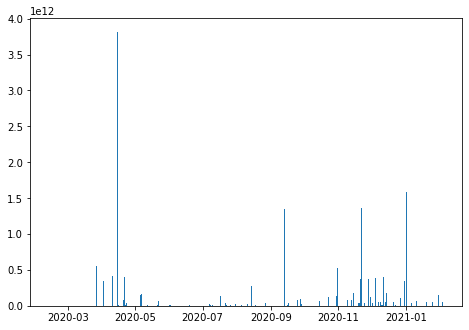

In [5]:
import matplotlib.pyplot as plt 
plt.ion()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
dates = date_group['Date']
amounts = date_group['Amount Committed/Disbursed']
ax.bar(dates,amounts)
plt.show()

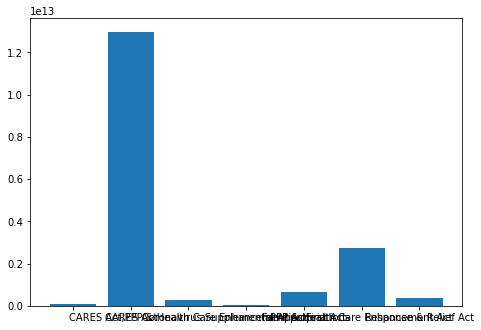

In [6]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
dates = leg_group['Legislation']
amounts = leg_group['Amount Committed/Disbursed']
ax.bar(dates,amounts)
plt.show()

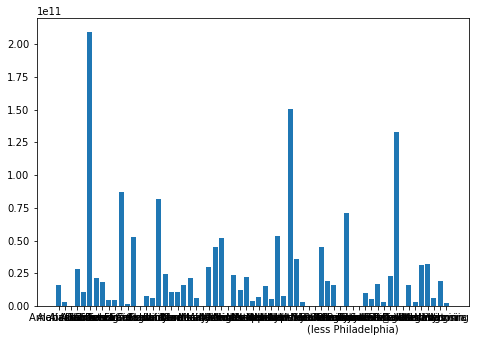

In [20]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
dates = state_group['Recipient State']
amounts = state_group['Amount Committed/Disbursed']
ax.bar(dates,amounts)
plt.show()